# Multiple Regression in R 
## based on Students' performance in Portuguese & Maths

**Team D** _#ce514_
* **Eleftherios-Panagiotis Loukas**
* **Klainti Bodurri**
* **Konstantinos Kanellis**

The dataset we use can be found in the UCI Machine Learning Repo here:
https://archive.ics.uci.edu/ml/datasets/student+performance

Based on various attributes of students in 2 Portuguese schools, we will predict their academic success.

# Data Set Information
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

**Important note**: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).



# Load the data

In [1]:
# Libraries & etc
set.seed(1)
library(car)
library(boot)

# Read tables from two comma-separated files
data1 = read.table("student-por.csv",sep=";",header=TRUE)
dataSet1 = data.frame(data1)
data2 = read.table("student-mat.csv",sep=";",header=TRUE)
dataSet2 = data.frame(data2)

# Our final dataset will be the merge of the 2 datasets above
dataSet = rbind(dataSet1, dataSet2) 


Attaching package: ‘boot’

The following object is masked from ‘package:car’:

    logit



# Clean the final dataset
As said in the intro information of the notebook, the grades are distributed in 3 attributes: G1, G2 & G3

In [2]:
# Change the names of the columns-attributes
names(dataSet) <- c("school","sex","age", "address","family size","parents cohab.", "mom's education", 
             "dad's education","mom's job", "dad's job","reason", "guardian","travel", "study", 
             "failures","education support","family support","paid","activities", "nursery","higher",    
             "internet","romantic","family bond","free time","social","workday alch.","weekend alch.","health",
             "absences","Grade 1","Grade 2","Grade 3")   

# Merge the 3 variables into 1 variable
Grade = (dataSet$`Grade 1` + dataSet$`Grade 2` + dataSet$`Grade 3`) / 3 

# Make these 3 columns ZERO and substitute them of the Grade variable
dataSet$`Grade 1` = NULL 
dataSet$`Grade 2` = NULL 
dataSet$`Grade 3` = NULL

dataSet = cbind(dataSet, Grade) # Substitution

attach(dataSet) # Attach the attributes to global env

The following object is masked _by_ .GlobalEnv:

    Grade



# Summary of the dataset

In [3]:
summary(dataSet)

 school   sex          age        address family size parents cohab.
 GP:772   F:591   Min.   :15.00   R:285   GT3:738     A:121         
 MS:272   M:453   1st Qu.:16.00   U:759   LE3:306     T:923         
                  Median :17.00                                     
                  Mean   :16.73                                     
                  3rd Qu.:18.00                                     
                  Max.   :22.00                                     
 mom's education dad's education    mom's job      dad's job          reason   
 Min.   :0.000   Min.   :0.000   at_home :194   at_home : 62   course    :430  
 1st Qu.:2.000   1st Qu.:1.000   health  : 82   health  : 41   home      :258  
 Median :3.000   Median :2.000   other   :399   other   :584   other     :108  
 Mean   :2.603   Mean   :2.388   services:239   services:292   reputation:248  
 3rd Qu.:4.000   3rd Qu.:3.000   teacher :130   teacher : 65                   
 Max.   :4.000   Max.   :4.000       

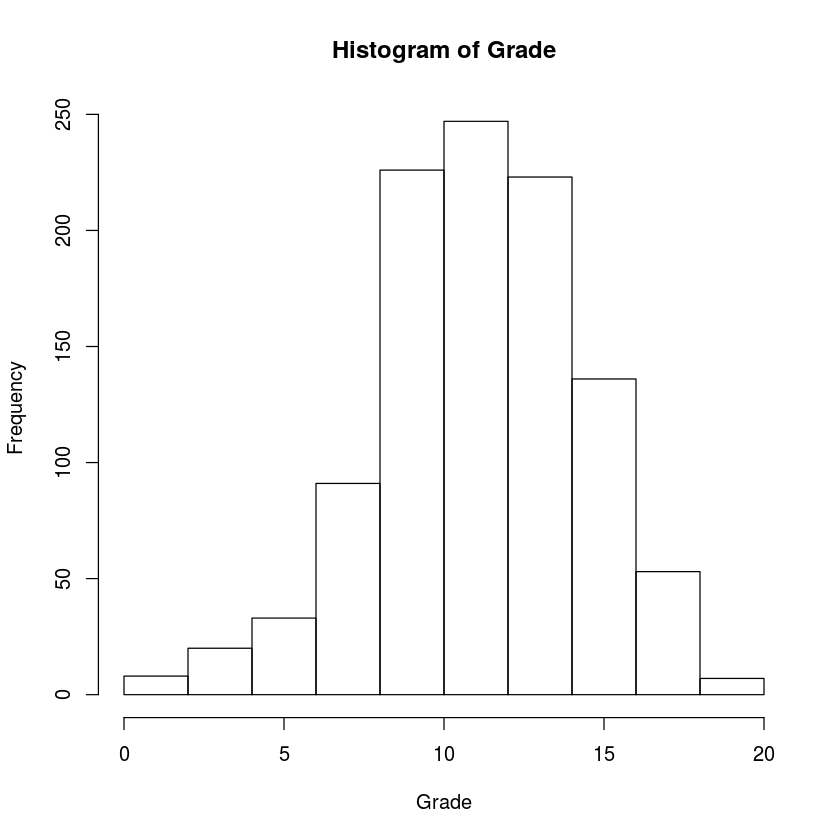

In [4]:
hist(Grade)

### Attributes of the model
### These can be used as predictors or 'x' in order for us to perform a multivariable regression

In [5]:
names(dataSet)

[1] "school"            "sex"               "age"              
 [4] "address"           "family size"       "parents cohab."   
 [7] "mom's education"   "dad's education"   "mom's job"        
[10] "dad's job"         "reason"            "guardian"         
[13] "travel"            "study"             "failures"         
[16] "education support" "family support"    "paid"             
[19] "activities"        "nursery"           "higher"           
[22] "internet"          "romantic"          "family bond"      
[25] "free time"         "social"            "workday alch."    
[28] "weekend alch."     "health"            "absences"         
[31] "Grade"

# Scatterplot
As predictors, we will consider the first 10 attributes.
This is equal to all the attributes from `school` to `dad's job`

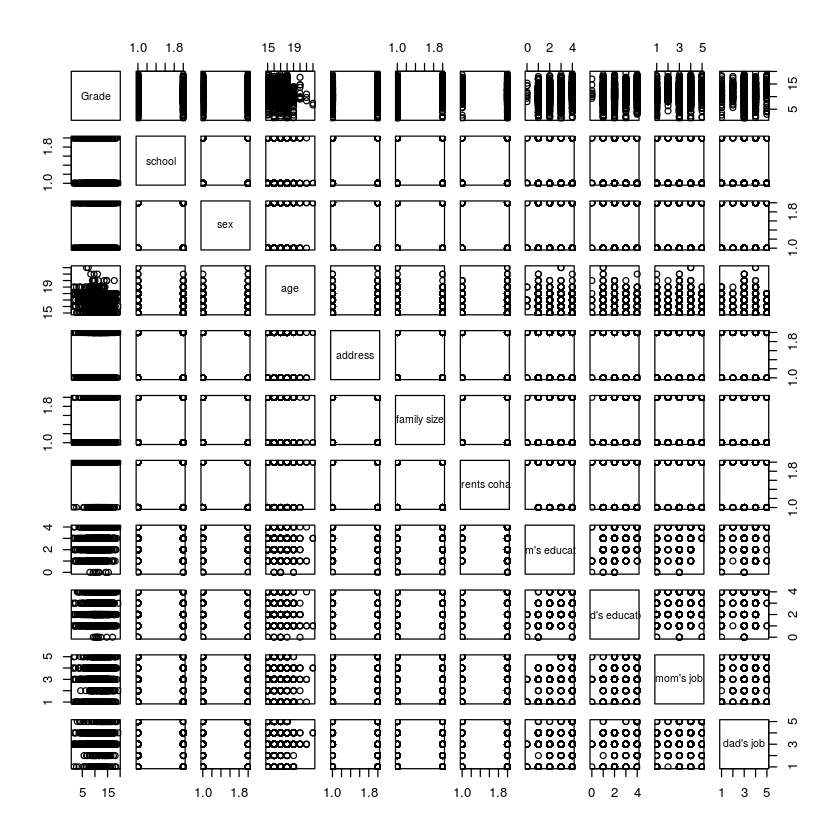

In [6]:
x1 <- dataSet[c(31, 1 : 10)] 
pairs(x1)

# Fit a multiple regression model 
## based on study, failures, extra education support, extra paid classes & the desire to take higher education

Everyone can use the predictors they want.
We thought that these are some nice ones to predict a grade of a student.

In [7]:
fit = lm(Grade ~ study + failures + `education support` + paid + higher, data = dataSet)
summary(fit)


Call:
lm(formula = Grade ~ study + failures + `education support` + 
    paid + higher, data = dataSet)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4849  -1.6574   0.0707   1.9185   7.9790 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9.2697     0.3692  25.108  < 2e-16 ***
study                    0.4942     0.1091   4.530 6.57e-06 ***
failures                -1.6364     0.1415 -11.566  < 2e-16 ***
`education support`yes  -1.2480     0.2796  -4.463 8.96e-06 ***
paidyes                 -0.6331     0.2193  -2.887  0.00397 ** 
higheryes                1.8935     0.3368   5.622 2.42e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.856 on 1038 degrees of freedom
Multiple R-squared:  0.2163,	Adjusted R-squared:  0.2125 
F-statistic:  57.3 on 5 and 1038 DF,  p-value: < 2.2e-16


# Explanation of statistics

## p - Value
The p-Values are very important because, We can consider a linear model to be statistically significant only when both these p-Values are less that the pre-determined statistical significance level, which is ideally 0.05.

We can confirm this by looking the **last column** in the **coefficients** section at `Pr(>|t|)`.

All of these predictors are good for our model.

Also, this is visually interpreted by the significance stars at the end of the row. The more the stars
beside the variable’s p-Value, the more significant the variable.

Last but not least, when the p-Value is less than significance level (< 0.05), we can safely reject the null hypothesis that the co-efficient β of the predictor is zero. In our case, both these p Values are well below the 0.05 threshold, so we can conclude our model is indeed statistically significant.

## t- Statistic
It's the column under the name of `t value` .

Each attribute has each own t-Statistic value. This equals to $ t-Statistic = \frac{\beta - coefficient}{Std.Error} $

For example, failures on our model have a `t-value` of `-11.566.`

When you run a hypothesis test, you’ll use a distribution like a t-distribution or normal distribution. These have a known area, and enable to you to calculate a probability value (p-value) that will tell you if your results are due to chance, or if your results are die to your theory being correct. The larger the test statistic, the smaller the p-value and the more likely you are to reject the null hypothesis.

## $ R^2 $: Coefficient of Determination (R-Squared)
The coefficient of determination of a linear regression model is the quotient of the variances of the fitted values and observed values of the dependent variable. If we denote $y_i$ as the observed values of the dependent variable, $ \bar y $ as its mean, and $\hat y_i$ as the fitted value, then the coefficient of determination is:

![Mathematical formula of R-Squared](http://www.r-tutor.com/sites/default/files/images/simple-regression5x.png)

In our model, **R-Squared Error* is equal to:

In [8]:
summary(fit)$r.squared 

[1] 0.2163004

which means that the proportion of variation in the dependent (response) variable is explained good in this model, since it the error is low.

_Quick Note:_ We don’t necessarily discard a model based on a low R-Squared value. It's a better practice to look at the AIC (by using the `glm` method in R) and prediction accuracy on validation sample when deciding on the efficacy of a model.

### What about *Adjusted R-Squared* ?
As you add more X variables to your model, the R-Squared value of the new bigger model will always be
greater than that of the smaller subset. This is because, since all the variables in the
original model is also present, their contribution to explain the dependent variable will
be present in the super-set as well, therefore, whatever new variable we add can only
add (if not significantly) to the variation that was already explained.

It is here, the adjusted R-Squared value comes to help. Adj R-Squared penalizes total value for the
number of terms (read predictors) in your model. **Therefore, when comparing nested
models, it is a good practice to look at adj-R-squared value over R-squared.**

In our model (see `summary` of `fit`), it's `0.2125` which verificates that our regression was good.

## Standard Error and F-Statistic
Both standard errors and F-statistic are measures of goodness of fit.

$$ Std. Error = \sqrt{MSE} = \sqrt{\frac{SSE}{n-q}} $$
and
$$ F-statistic = \frac{MSR}{MSE} $$
where, $n$ is the number of observations, $q$ is the number of coefficients and $MSR$ is the
mean square regression.


Standard Error is low on our model, something that confirms the goodness of fit of our regression predictors.

This applies to the F-statistic value too.

## Mean Squared Error

The $MSE$ is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.

The mean squared error (MSE) is the mean of the square of the residuals:

In [9]:
MSE = mean(fit$residuals^2)
MSE

[1] 8.111904

As confirmed by other metrics, our regression model is good.

## Root Mean Squared Error(RMSE)
As the title says, Root mean squared error (RMSE) is then the square root of MSE:

In [10]:
RMSE <- sqrt(MSE)
RMSE

[1] 2.84814

## Residual Sum Of Squares (RSS)
Residual sum of squares (RSS) is the sum of the squared residuals:

In [11]:
rss = sum(residuals(fit)^2)
rss

[1] 8468.828

## Residual Standard Error (RSE)
is the square root of (RSS / degrees of freedom):

In [12]:
rse = sqrt( sum(residuals(fit)^2) / fit$df.residual ) 
rse

[1] 2.85636